In [1]:
import csv
import calplot
import pandas as pd
import matplotlib.pyplot as plt
from imdb import IMDb
from datetime import datetime
import trakt.core
from trakt.movies import Movie
from trakt.tv import TVShow

In [ ]:
trakt.core.AUTH_METHOD = trakt.core.OAUTH_AUTH
trakt.core.init("mzfr", store=True)

In [14]:
# Download loads of information and might take sometime to run

movies_info = {}

ia = IMDb()

with open("export_movie_history.csv", "r") as f:
    movies = csv.DictReader(f)
    for movie in movies:
        date_str = datetime.strptime(movie["watched_at"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%Y-%m-%d")
        date = datetime.strptime(date_str, "%Y-%m-%d")
        if date.year != 2021:
            continue
        else:
#         code = movie["imdb"][2:] # This is for imdb package
            code = movie["trakt"]

            if code in movies_info:
                movies_info[code]['count'] += 1
            else:
                movies_info[code] = {}
                movies_info[code]['count'] = 1
                movies_info[code]['date'] = date
    #             imdb_info = ia.get_movie(code)
                movie_details = Movie(code) # This is using the trakt package and getting information from trakt.tv website
                movies_info[code]['runtime'] = movie_details.runtime
                movies_info[code]['genres'] = movie_details.genres

In [19]:
totalTime = 0
genres = {}
# print(movies_info)
for code, info in movies_info.items():
    if info['date'].year != 2021:
        continue
    totalTime += int(info['runtime'])
    for g in info["genres"]:
        if g in genres:
            genres[g] += 1
        else:
            genres[g] = 1    

TotalTime spent watching movies:  58 hr


<AxesSubplot:ylabel='Genre'>

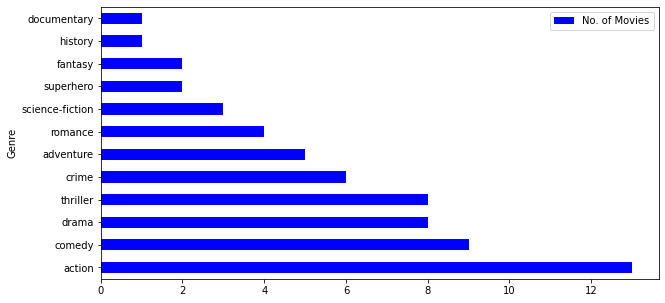

In [31]:
print("TotalTime spent watching movies: ", totalTime//60, "hr")

data = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))
genre_df = pd.DataFrame(data.items(), columns=["Genre", "No. of Movies"])
genre_df.plot(kind="barh", x=0,y=1, figsize=(10,5), color='blue')

In [22]:
tvShows = {}
dayWiseTV = {}
with open("export_shows_history.csv", "r") as f:
    shows = csv.DictReader(f)
    for show in shows:
        date_str = datetime.strptime(show["watched_at"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%Y-%m-%d")
        date = datetime.strptime(date_str, "%Y-%m-%d")
        code = show["trakt"]
        if date.year != 2021:
            continue
        else:
            if code in tvShows:
                tvShows[code]["count"] += 1
            else:
                tvShows[code] = {}
                tvShows[code]["count"] = 1
                tvShows[code]["date"] = date_str
#                 imdb_info = ia.get_movie(code)
                # Some indian shows didn't had these values
                show = TVShow(code)
                tvShows[code]["runtime"] = show.runtime
                tvShows[code]["genres"] = show.genres

            if date in dayWiseTV:
                dayWiseTV[date] += 1
            else:
                dayWiseTV[date] = 1

In [38]:
totalTvTime = 0
tvGenres = {}
for code, info in tvShows.items():
    if "2021" not in info['date']:
        continue
    if "runtime" in info:
        # Even on imdb the data is bit uneven
        # For some shows the runtime tells you the complete runtime of the show
        # Ex: The Queen's gambit there are 7 episode and total time of 6h 33 min
        #     So runtime for that was 393 instead of 1 episode
        # That is why here if any show have the runtime of more than an hour that
        #  means it the total time and not the time of an episode
        if int(info["runtime"]) > 60:
            totalTvTime += int(info["runtime"])
        else:
            totalTvTime += (int(info['runtime'])*info["count"])
    if "genres" in info:
        for g in info["genres"]:
            if g in tvGenres:
                tvGenres[g] += 1
            else:
                tvGenres[g] = 1  

TotalTime spent watching TV Shows:  672 hr


<AxesSubplot:ylabel='Genre'>

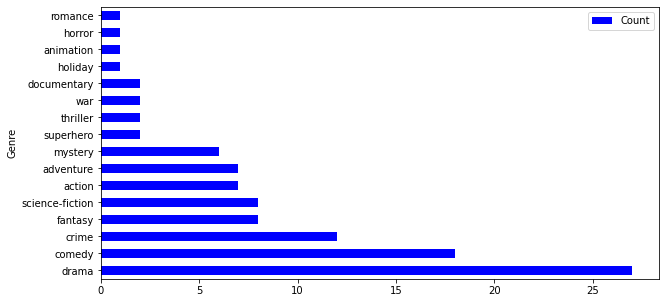

In [40]:
print("TotalTime spent watching TV Shows: ", totalTvTime//60, "hr")

data = dict(sorted(tvGenres.items(), key=lambda item: item[1], reverse=True))
tvgenre_df = pd.DataFrame(data.items(), columns=["Genre", "Count"])
tvgenre_df.plot(kind="barh", x=0,y=1, figsize=(10,5), color='blue')

(<Figure size 900x122.4 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

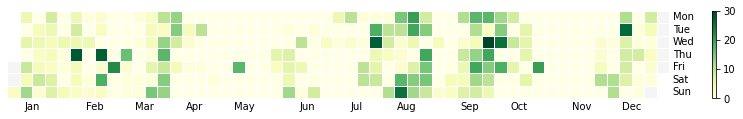

In [41]:
dataToPlot = {}

for k,v in dayWiseTV.items():
    if k.year == 2021:
        dataToPlot[k] = v

series = pd.Series(dataToPlot)
calplot.calplot(series, cmap='YlGn', edgecolor=None, yearlabels=False)